# Scientific Programming in Python (SPiP) - Data Analysis with Pandas


#Content and Goals

##Content

* What is Pandas?
* Basic Data Structures: Series and Data Frame
* Basic Functions
* Descriptive statistic
* IO Tools
* Visualisation with Pandas

##Goals 
* Multivariate Data processing
* Loading, filtering, analysing data sets
* Basic visualisation/plotting functions


# 1. What is Pandas

*pandas is a Python package providing fast, ﬂexible, and expressive data structures designed to make working with
“relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing
practical, real world data analysis in Python* (http://pandas.pydata.org/) 

Pandas builds on top of Numpy to ease managing heterogeneous data sets.


## 1.1 Data Handled by Pandas

Pandas is well suited for many different kinds of data:

* Tabular data with heterogeneously-typed columns (comparable to EXCEL, R or relational Databases)
* Time series data
*  Matrix data(homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. 


## 1.2 Feature Overview

* Easy handling of missing data (represented as NaN)
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Automatic and explicit data alignment: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let Series, DataFrame, etc. automatically align the data for you in computations
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both ag- gregating and transforming data
* Make it easy to convert ragged, differently-indexed data in other Python and NumPy data structures into DataFrame objects
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Hierarchical labeling of axes (possible to have multiple labels per tick)
* Robust IO tools for loading and storing data 
* Time series-specific functionality
* Fast realization in Cython



# 2. Pandas Data Structures

Pandas is build around two data structures

* `Series` represent 1 dimensional datasets as subclass of Numpy's ndarray
* `DataFrame` represent 2 dimensional data sets as list of `Series`
* `Panel` represents higher dimensional data as dictionaries of `DataFrame`'s. We do not discuss `Panel`'s here.

For all data structures, labels/indices can be defined per row and column. 

Data alignment is intrinsict, i.e. the link between labels and data will not be broken.



## 2.1. Series: labelled arrays

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, ﬂoating point numbers,Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is
to call:

    Series(data, index=index)
    
`data` may be a dict, a `numpy.ndarray` or a sclar value

**Creating a series**

In [1]:
import numpy as np # we need numpy
import pandas as pd #import pandas


values = np.array([2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0]) #create numpy array
ser = pd.Series(values) # now create series
print (ser)

0     2.0000
1     1.0000
2     5.0000
3     0.9700
4     3.0000
5    10.0000
6     0.0599
7     8.0000
dtype: float64


In [2]:
#now lets put some index on the data
#indices will be great later on when accessing datas
#indices represent unique identifiers for rows
values = np.array([2.0, 1.0, 5.0, 0.97, 3.0, 10.0, 0.0599, 8.0])
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
ser = pd.Series(data=values, index=labels)#values and labels must have the same dimension
print (ser)


A     2.0000
B     1.0000
C     5.0000
D     0.9700
E     3.0000
F    10.0000
G     0.0599
H     8.0000
dtype: float64


In [3]:
#craeting a heterogeneous series
movie_rating = {
    'age': 1,
    'gender': 'F',
    'genres': 'Drama',
    'movie_id': 1193,
    'occupation': 10,
    'rating': 5,
    'timestamp': 978300760,
    'title': "One Flew Over the Cuckoo's Nest (1975)",
    'user_id': 1,
    'zip': '48067'
    }
ser = pd.Series(movie_rating)
print (ser)

age                                                1
gender                                             F
genres                                         Drama
movie_id                                        1193
occupation                                        10
rating                                             5
timestamp                                  978300760
title         One Flew Over the Cuckoo's Nest (1975)
user_id                                            1
zip                                            48067
dtype: object


In [4]:
#show the index
ser.index

Index(['age', 'gender', 'genres', 'movie_id', 'occupation', 'rating',
       'timestamp', 'title', 'user_id', 'zip'],
      dtype='object')

In [5]:
#show the value
ser.values

array([1, 'F', 'Drama', 1193, 10, 5, 978300760,
       "One Flew Over the Cuckoo's Nest (1975)", 1, '48067'], dtype=object)

**Series Indexing**

Accessing elements in a series can be either done via the number or the index

In [6]:
#use the row number
ser[0]

1

In [7]:
#use the index like in a dict object
ser['gender']

'F'

In [8]:
ser.get_value('gender')

'F'

**Operations between Series with different index objects**

Index objects are unique and used in operations between series

In [9]:
ser_1 = pd.Series(data=[1,3,4], index=['A', 'B', 'C']) #series 1
ser_2 = pd.Series(data=[5,5,5], index=['A', 'G', 'C']) #series 2 but with different indices
print (ser_1 + ser_2) #note that if an index not exists, its value is undefined

A    6.0
B    NaN
C    9.0
G    NaN
dtype: float64


**A `Series` is like a `Numpy.ndarray`**

It can be used in Numpy functions.

In [10]:
s=pd.Series(np.random.randn(5),index=["a", "b", "c", "d", "e"])
print (s)
print ("epx(s)\n",np.exp(s[:3]))
print (s)

a    1.695949
b   -0.137781
c    1.753897
d   -0.919139
e   -0.799498
dtype: float64
epx(s)
 a    5.451815
b    0.871289
c    5.777074
dtype: float64
a    1.695949
b   -0.137781
c    1.753897
d   -0.919139
e   -0.799498
dtype: float64


**Naming a series**

A series can have a name, i.e. a series label (or if viewed column wise the name of the column)

In [11]:
s.name="Name of my Series"
print (s)

a    1.695949
b   -0.137781
c    1.753897
d   -0.919139
e   -0.799498
Name: Name of my Series, dtype: float64


## 2.2. DataFrame: a Series of Series

The pandas DataFrame is a 2 dimensional labeled data structure with columns of potentially different types. Similar to 
* a spreadsheet 
* relational database table 
* a dictionary of series

**Creating DataFrame's**

DataFrame's can be created from
* dict of Series
* dict of ndarrays
* structured or record arrays
* from a list of dicts
* From a dict of tuples
* From a Series

In [12]:
#dict of series
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print (df)
print (pd.DataFrame(d,index=['d','b','a'])) # create data frame with index subset
print
print ("Index:", df.index)
print ("Columns:", df.columns)

   one  two
a  1.0  1.0
b  2.0  2.0
c  3.0  3.0
d  NaN  4.0
   one  two
d  NaN  4.0
b  2.0  2.0
a  1.0  1.0
Index: Index(['a', 'b', 'c', 'd'], dtype='object')
Columns: Index(['one', 'two'], dtype='object')


In [13]:
#dict of lists
d = {'one' : [1., 2., 3., 4.],
    'two' :  [1., 2., 3., 4.]}
print (pd.DataFrame(d))

   one  two
0  1.0  1.0
1  2.0  2.0
2  3.0  3.0
3  4.0  4.0


In [14]:
#form a list of dicts
data2 = [{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]
print (pd.DataFrame(data2))

   a   b     c
0  1   2   NaN
1  5  10  20.0


In [15]:
# a dict of tuples
print (pd.DataFrame({('a', 'b'): {('A', 'B'): 1, ('A', 'C'): 2},
 ('a', 'a'): {('A', 'C'): 3, ('A', 'B'): 4},
 ('a', 'c'): {('A', 'B'): 5, ('A', 'C'): 6},
 ('b', 'a'): {('A', 'C'): 7, ('A', 'B'): 8},
 ('b', 'b'): {('A', 'D'): 9, ('A', 'B'): 10}}) )

       a              b      
       a    b    c    a     b
A B  4.0  1.0  5.0  8.0  10.0
  C  3.0  2.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0


**Column selection, addition, deletion**

DataFrame's work similar to dict objects

In [16]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
    'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
print (df['one'])

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64


In [17]:
df['three']=df['one']*df['two']
print (df)

   one  two  three
a  1.0  1.0    1.0
b  2.0  2.0    4.0
c  3.0  3.0    9.0
d  NaN  4.0    NaN


In [18]:
del df['two']
print (df)

   one  three
a  1.0    1.0
b  2.0    4.0
c  3.0    9.0
d  NaN    NaN


In [19]:
df['foo']='bar'
print (df)

   one  three  foo
a  1.0    1.0  bar
b  2.0    4.0  bar
c  3.0    9.0  bar
d  NaN    NaN  bar


In [20]:
print ("Before")
print (df)
df.insert(1,"bar",df["one"])
print ("After")
print (df)

Before
   one  three  foo
a  1.0    1.0  bar
b  2.0    4.0  bar
c  3.0    9.0  bar
d  NaN    NaN  bar
After
   one  bar  three  foo
a  1.0  1.0    1.0  bar
b  2.0  2.0    4.0  bar
c  3.0  3.0    9.0  bar
d  NaN  NaN    NaN  bar


**Indexing/Selection**

<table>
<tr><td>Operation</td><td>Syntax</td><td>Result</td></tr>
<tr><td>Select column</td><td>df[col]</td><td>Series</td></tr>
<tr><td>Select columns by labels</td><td>df[[list of labels]]</td><td>DataFrame</td></tr>
<tr><td>Select row by index</td><td>df.loc[index]</td><td>Series</td></tr>
<tr><td>Select row by integer location</td><td>df.iloc[loc]</td><td>Series</td></tr>
<tr><td>Slice rows</td><td>df[5:10]</td><td>DataFrame</td></tr>
<tr><td>Select rows by boolean vector</td><td>df[bool_vec]</td><td>DataFrame</td></tr>
<tr><td> Flexible slicing</td><td>df.ix[rowselector, columnselector]</td><td>Variable</td></tr>
</table>

In [21]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [22]:
df[2:4]

,one,bar,three,foo
c,3.0,3.0,9.0,bar
d,NaN,NaN,NaN,bar


In [23]:
df[["one","three"]]

,one,three
a,1.0,1.0
b,2.0,4.0
c,3.0,9.0
d,NaN,NaN


In [24]:
df[[False,False,True,True]]

,one,bar,three,foo
c,3.0,3.0,9.0,bar
d,NaN,NaN,NaN,bar


In [25]:
print (df)
print ("Selecting row 'b'")
df.loc['b']

   one  bar  three  foo
a  1.0  1.0    1.0  bar
b  2.0  2.0    4.0  bar
c  3.0  3.0    9.0  bar
d  NaN  NaN    NaN  bar
Selecting row 'b'


one        2
bar        2
three      4
foo      bar
Name: b, dtype: object

In [26]:
#flexible indexing via .ix method
print (df)

   one  bar  three  foo
a  1.0  1.0    1.0  bar
b  2.0  2.0    4.0  bar
c  3.0  3.0    9.0  bar
d  NaN  NaN    NaN  bar


In [27]:
print (df.ix[:2,1:2])#gives a data frame

   bar
a  1.0
b  2.0


In [28]:
print (df.ix[:2,1]) #gives a series

a    1.0
b    2.0
Name: bar, dtype: float64


In [29]:
print (df.ix[:2,"bar"])#gives a sereies

a    1.0
b    2.0
Name: bar, dtype: float64


In [30]:
print (df.ix[:2,["bar"]])#gives a data frame

   bar
a  1.0
b  2.0


**Boolean Masking and where()**

As in Numpy, we can use masks for accessing data elements

In [31]:
df2 = pd.DataFrame({'a' : ['one','one','two','three','two','one','six'],
                 'b' : ['x','y','y','x','y','x','x'],
                 'c' : np.random.randn(7)})
print (df2)
criterion = df2['a'].map(lambda x: x.startswith('t')) #create a criterion using lambda function


       a  b         c
0    one  x  0.397209
1    one  y -1.467602
2    two  y  0.570070
3  three  x  0.720559
4    two  y -0.554544
5    one  x -0.308509
6    six  x -0.733021


In [32]:
print (criterion)

0    False
1    False
2     True
3     True
4     True
5    False
6    False
Name: a, dtype: bool


In [33]:
print (df2[criterion])

       a  b         c
2    two  y  0.570070
3  three  x  0.720559
4    two  y -0.554544


In [34]:
#disjunction of two filter criterions using bit-and
df2[(df2['a']=='one')&(df2['b']=='x')]

,a,b,c
0,one,x,0.397209
5,one,x,-0.308509


In [35]:
#check for several values over all columns with isin
df3 = pd.DataFrame({'vals': [1, 2, 3, 4], 
                    'ids': ['a', 'b', 'f', 'n'],
                    'ids2': ['a', 'n', 'c', 'n']})

values = ['a', 'b', 1, 3]
print (df3.isin(values))

     ids   ids2   vals
0   True   True   True
1   True  False  False
2  False  False   True
3  False  False  False


In [36]:
#with where we can guarantee the the shape stays the same
s=df2['c']
print (s)
print (s.where(s>0))

0    0.397209
1   -1.467602
2    0.570070
3    0.720559
4   -0.554544
5   -0.308509
6   -0.733021
Name: c, dtype: float64
0    0.397209
1         NaN
2    0.570070
3    0.720559
4         NaN
5         NaN
6         NaN
Name: c, dtype: float64


**Data alignment and arithmetic**

DataFrame objects automatically align on both the columns and the index (row labels). Again, the resulting object will have the union of the column and row labels.

In [37]:
df = pd.DataFrame(np.random.randn(10, 4), columns=['A', 'B', 'C', 'D']) 
df2 = pd.DataFrame(np.random.randn(7, 3), columns=['A', 'B', 'C'])
print (df + df2)

          A         B         C   D
0 -2.397290  0.053219 -0.560677 NaN
1  1.021603 -0.297019  0.548527 NaN
2 -0.349425  1.610391  1.738908 NaN
3 -1.234902  0.076946 -1.662344 NaN
4 -1.572823 -0.686018  0.662440 NaN
5  0.608798 -1.111543 -1.354657 NaN
6  1.582757 -0.395040  0.761686 NaN
7       NaN       NaN       NaN NaN
8       NaN       NaN       NaN NaN
9       NaN       NaN       NaN NaN


** Broadcasting behaviour**

When doing an operation between DataFrame and Series, the default behavior is to align the Series index on the DataFrame columns, thus broadcasting row-wise. 


In [38]:
print (df)
print ("==========================================")
print (df.iloc[0])
print ("==========================================")
print (df-df.iloc[0])

          A         B         C         D
0 -1.193378  0.362220 -0.185914  1.408487
1  0.713218  0.052878 -0.090530 -1.129024
2 -1.014749  0.412556  0.382431  0.740610
3 -2.029758 -0.486587 -1.354926 -0.115527
4 -0.846842 -0.588906  0.464537 -1.063856
5  1.096341 -1.216381 -0.926981 -1.840147
6 -0.573001  0.452942 -0.264215 -0.126698
7  0.382752  1.332689  1.002710  1.080878
8 -0.028819  0.372059  1.438581 -1.367700
9 -0.605105  0.527056  0.017148 -1.712500
A   -1.193378
B    0.362220
C   -0.185914
D    1.408487
Name: 0, dtype: float64
          A         B         C         D
0  0.000000  0.000000  0.000000  0.000000
1  1.906595 -0.309343  0.095384 -2.537511
2  0.178629  0.050336  0.568345 -0.667877
3 -0.836381 -0.848807 -1.169012 -1.524014
4  0.346535 -0.951127  0.650451 -2.472343
5  2.289719 -1.578602 -0.741067 -3.248634
6  0.620377  0.090721 -0.078300 -1.535185
7  1.576130  0.970468  1.188624 -0.327609
8  1.164559  0.009838  1.624495 -2.776186
9  0.588272  0.164836  0.203062 -3.120

In [39]:
#broadcasting with scalars as in numpy
df*2

,A,B,C,D
0,-2.386755,0.724440,-0.371828,2.816974
1,1.426435,0.105755,-0.181060,-2.258048
2,-2.029498,0.825112,0.764862,1.481221
3,-4.059516,-0.973174,-2.709852,-0.231054
4,-1.693685,-1.177813,0.929074,-2.127712
5,2.192683,-2.432763,-1.853962,-3.680294
6,-1.146001,0.905883,-0.528429,-0.253396
7,0.765504,2.665377,2.005420,2.161757
8,-0.057637,0.744117,2.877161,-2.735399
9,-1.210211,1.054112,0.034296,-3.425001


When working with time series (`TimeSeries`) broadcasting is done column wise. However this function is **deprecated**

In [40]:
index = pd.date_range('1/1/2000', periods=8)
df = pd.DataFrame(np.random.randn(8, 3), index=index, columns=list('ABC'))
print (df)

                   A         B         C
2000-01-01  0.510118  3.889524  1.923528
2000-01-02  1.475033  1.904546  0.130995
2000-01-03 -1.617337  0.054794  0.989100
2000-01-04  0.531948  0.064584  1.184315
2000-01-05  0.073592 -0.258974 -2.469773
2000-01-06  0.425837 -0.821244 -1.563358
2000-01-07  0.362407  0.265029  1.022454
2000-01-08  1.488831 -0.257652 -0.040991


In [41]:
print (df - df['A'])

            2000-01-01 00:00:00  2000-01-02 00:00:00  2000-01-03 00:00:00  \
2000-01-01                  NaN                  NaN                  NaN   
2000-01-02                  NaN                  NaN                  NaN   
2000-01-03                  NaN                  NaN                  NaN   
2000-01-04                  NaN                  NaN                  NaN   
2000-01-05                  NaN                  NaN                  NaN   
2000-01-06                  NaN                  NaN                  NaN   
2000-01-07                  NaN                  NaN                  NaN   
2000-01-08                  NaN                  NaN                  NaN   

            2000-01-04 00:00:00  2000-01-05 00:00:00  2000-01-06 00:00:00  \
2000-01-01                  NaN                  NaN                  NaN   
2000-01-02                  NaN                  NaN                  NaN   
2000-01-03                  NaN                  NaN                  NaN  

**Transposing a Data Frame**


In [42]:
print (df[:5])
print (df[:5].T)

                   A         B         C
2000-01-01  0.510118  3.889524  1.923528
2000-01-02  1.475033  1.904546  0.130995
2000-01-03 -1.617337  0.054794  0.989100
2000-01-04  0.531948  0.064584  1.184315
2000-01-05  0.073592 -0.258974 -2.469773
   2000-01-01  2000-01-02  2000-01-03  2000-01-04  2000-01-05
A    0.510118    1.475033   -1.617337    0.531948    0.073592
B    3.889524    1.904546    0.054794    0.064584   -0.258974
C    1.923528    0.130995    0.989100    1.184315   -2.469773


**Compatibility with Numpy**

Given numeric values, numpy element wise functions can be used

In [43]:
print (df)
print (np.exp(df))

                   A         B         C
2000-01-01  0.510118  3.889524  1.923528
2000-01-02  1.475033  1.904546  0.130995
2000-01-03 -1.617337  0.054794  0.989100
2000-01-04  0.531948  0.064584  1.184315
2000-01-05  0.073592 -0.258974 -2.469773
2000-01-06  0.425837 -0.821244 -1.563358
2000-01-07  0.362407  0.265029  1.022454
2000-01-08  1.488831 -0.257652 -0.040991
                   A          B         C
2000-01-01  1.665488  48.887623  6.845063
2000-01-02  4.371179   6.716359  1.139962
2000-01-03  0.198426   1.056323  2.688814
2000-01-04  1.702246   1.066715  3.268448
2000-01-05  1.076367   0.771843  0.084604
2000-01-06  1.530871   0.439884  0.209432
2000-01-07  1.436783   1.303469  2.780009
2000-01-08  4.431913   0.772864  0.959838


## 3 Basic Functionality

* Accessing head and tails via `DataFrame.head` and `DataFrame.tail`
* Explicit arithmetic operations:  `DataFrame.add`, `DataFrame.sub` etc. allow to control broadcasting and value filling
* DataFrame comparators: `DataFrame.gt`, `DataFrame.ne` etc.
* Boolean reductions: `DataFrame.all()`, `DataFrame.any()``



## 3.1 Head and Tail

Viewing long series/data frames

In [44]:
long_series = pd.Series(np.random.randn(1000))
print (long_series.head())

0   -0.653285
1   -0.865533
2   -0.361412
3   -0.220708
4    0.225272
dtype: float64


In [45]:
print (long_series.tail())

995    1.541859
996    0.291662
997   -0.961986
998    0.101844
999    0.234632
dtype: float64


In [46]:
print (long_series)# see reduce printing behaviour

0     -0.653285
1     -0.865533
2     -0.361412
3     -0.220708
4      0.225272
5     -1.416084
6      0.100536
7      1.821810
8     -0.025045
9     -0.455368
10     0.971690
11    -1.701802
12     2.788344
13     0.186438
14    -1.563145
15     0.582845
16    -0.834318
17    -0.506008
18     0.015123
19     0.847408
20    -0.131787
21    -0.550609
22    -1.027453
23     0.848934
24    -0.691227
25     0.451914
26     0.491481
27     0.291125
28    -0.613710
29     1.689074
         ...   
970    0.383880
971   -0.229128
972    0.854397
973   -0.408504
974   -0.213414
975    0.218063
976   -0.701190
977   -0.607696
978    1.895958
979   -0.619735
980    0.135332
981    1.017930
982    0.814764
983    0.848620
984   -0.051340
985    1.280587
986   -0.178101
987   -1.042671
988    2.137616
989    1.389060
990   -0.172996
991    0.225781
992   -0.256933
993    0.495566
994   -0.924152
995    1.541859
996    0.291662
997   -0.961986
998    0.101844
999    0.234632
dtype: float64


#4. Descriptive Statistics

Descriptive Statistics sumarizes the underlying distribution of data values through statistical values like mean, variance etc.

##4.1 Basic Functions

<table>
<tr><td>Function</td><td>Description</td>
<tr><td>count</td><td>Number of non-null observations</td>
<tr><td>sum</td><td>Sum of values</td>
<tr><td>mean</td><td>Mean of values</td>
<tr><td>mad</td><td>Mean absolute deviation</td>
<tr><td>median</td><td>Arithmetic median of values</td>
<tr><td>min</td><td>Minimum</td>
<tr><td>max</td><td>Maximum</td>
<tr><td>mode</td><td>Mode</td>
<tr><td>abs</td><td>Absolute Value</td>
<tr><td>prod</td><td>Product of values</td>
<tr><td>std</td><td>Unbiased standard deviation</td>
<tr><td>var</td><td>Unbiased variance</td>
<tr><td>skew</td><td>Unbiased skewness (3rd moment)</td>
<tr><td>kurt</td><td>Unbiased kurtosis (4th moment)</td>
<tr><td>quantile</td><td>Sample quantile (value at %)</td>
<tr><td>cumsum</td><td>Cumulative sum</td>
<tr><td>cumprod</td><td>Cumulative product</td>
<tr><td>cummax</td><td>Cumulative maximum</td>
<tr><td>cummin</td><td>Cumulative minimum</td>
</table>


In [47]:
print (df)

                   A         B         C
2000-01-01  0.510118  3.889524  1.923528
2000-01-02  1.475033  1.904546  0.130995
2000-01-03 -1.617337  0.054794  0.989100
2000-01-04  0.531948  0.064584  1.184315
2000-01-05  0.073592 -0.258974 -2.469773
2000-01-06  0.425837 -0.821244 -1.563358
2000-01-07  0.362407  0.265029  1.022454
2000-01-08  1.488831 -0.257652 -0.040991


In [48]:
#some examples
print (df.max())
print ("========================================")
print (df.max(axis=1))

A    1.488831
B    3.889524
C    1.923528
dtype: float64
2000-01-01    3.889524
2000-01-02    1.904546
2000-01-03    0.989100
2000-01-04    1.184315
2000-01-05    0.073592
2000-01-06    0.425837
2000-01-07    1.022454
2000-01-08    1.488831
Freq: D, dtype: float64


##4.2 Describe

`describe` summarizes a DataFrame

In [49]:
df.describe()

,A,B,C
count,8.000000,8.000000,8.000000
mean,0.406304,0.605076,0.147034
std,0.967230,1.545134,1.488818
min,-1.617337,-0.821244,-2.469773
25%,0.290203,-0.257983,-0.421583
50%,0.467978,0.059689,0.560048
75%,0.767719,0.674908,1.062919
max,1.488831,3.889524,1.923528


## 4.3 Index  of min and max

In [50]:
print (df)

                   A         B         C
2000-01-01  0.510118  3.889524  1.923528
2000-01-02  1.475033  1.904546  0.130995
2000-01-03 -1.617337  0.054794  0.989100
2000-01-04  0.531948  0.064584  1.184315
2000-01-05  0.073592 -0.258974 -2.469773
2000-01-06  0.425837 -0.821244 -1.563358
2000-01-07  0.362407  0.265029  1.022454
2000-01-08  1.488831 -0.257652 -0.040991


In [51]:
print (df.idxmax(axis=0))
print ("============================")
print (df.idxmin(axis=0))
print ("============================")
print (df.idxmax(axis=1))
print ("============================")
print (df.idxmin(axis=1))


A   2000-01-08
B   2000-01-01
C   2000-01-01
dtype: datetime64[ns]
A   2000-01-03
B   2000-01-06
C   2000-01-05
dtype: datetime64[ns]
2000-01-01    B
2000-01-02    B
2000-01-03    C
2000-01-04    C
2000-01-05    A
2000-01-06    A
2000-01-07    C
2000-01-08    A
Freq: D, dtype: object
2000-01-01    A
2000-01-02    C
2000-01-03    A
2000-01-04    B
2000-01-05    C
2000-01-06    C
2000-01-07    B
2000-01-08    B
Freq: D, dtype: object


##4.4 Histogram

`value_counts()`allows to count the histogram

In [52]:
data = np.random.randint(0, 7, size=50)
s = pd.Series(data)
print (s.value_counts())

6    9
4    9
5    8
2    7
3    6
0    6
1    5
dtype: int64


# 5 Group By

Pandas supports grouping data frames for particular columns similar to a SQL group by clause.

In [53]:
help(df.groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Group series using mapper (dict or key function, apply given function
    to group, return result as series) or by a series of columns.
    
    Parameters
    ----------
    by : mapping function / list of functions, dict, Series, or tuple /
        list of column names.
        Called on each element of the object index to determine the groups.
        If a dict or Series is passed, the Series or dict VALUES will be
        used to determine the groups
    axis : int, default 0
    level : int, level name, or sequence of such, default None
        If the axis is a MultiIndex (hierarchical), group by a particular
        level or levels
    as_index : boolean, default True
        For aggregated output, return object with group labels as the
        index. Only relevant for Dat

In [54]:
df2 = pd.DataFrame({'a' : ['one','one','two','three','two','one','six'],
                 'b' : ['x','y','y','x','y','x','x'],
                 'c' : np.random.randn(7)})
print (df2)


       a  b         c
0    one  x -1.928164
1    one  y -1.543005
2    two  y -1.612611
3  three  x -0.281879
4    two  y -0.776053
5    one  x  0.491386
6    six  x  0.189380


In [55]:
print (df2.groupby('a')) #creates a groupby object

In [56]:
#gropuing requires an aggregate function
print (df2.groupby('a').mean()) #creates a groupby object

              c
a              
one   -0.993261
six    0.189380
three -0.281879
two   -1.194332


In [57]:
#works on multiple levels
print (df2.groupby(['a','b']).mean())

                c
a     b          
one   x -0.718389
      y -1.543005
six   x  0.189380
three x -0.281879
two   y -1.194332


# 6. IO Tools

The Pandas I/O api is a set of top level reader functions accessed like `pd.read_csv()` that generally return a pandas object.
* read_csv
* read_excel
* read_hdf
* read_sql
* read_json
* read_msgpack (experimental) 
* read_html
* read_gbq (experimental)
* read_stata
* read_clipboard
* read_pickle

The corresponding writer functions are object methods that are accessed like df.to_csv() • to_csv
* to_excel
* to_hdf
* to_sql
* to_json
* to_msgpack (experimental) • to_html
* to_gbq (experimental) • to_stata
* to_clipboard
* to_pickle


** Open Data Access **

Further, pandas supports some open data APIs, namely

* Yahoo! Finance
* Google Finance
* St. Louis FED (FRED)
* Kenneth French’s data library 
* World Bank

#6.1 Loading the Weather Data from the CSV

In this example we load the weather datafrom the data directory ( "data\weather_data.csv") 

In [58]:
#! executes a shell command
!ls data

iris.dat  stockholm_td_adj.dat	weather_data.csv


In [59]:
!cat data/weather_data.csv

Day,outlook,temperature,humidity,windy,play
1,sunny,85,85,false,no
2,sunny,80,90,true,no
3,overcast,83,86,false,yes
4,rainy,70,96,false,yes
5,rainy,68,80,false,yes
6,rainy,65,70,true,no
7,overcast,64,65,true,yes


In [82]:
df = pd.read_csv("data/weather_data.csv")
print (df)

   Day   outlook  temperature  humidity  windy play
0    1     sunny           85        85  False   no
1    2     sunny           80        90   True   no
2    3  overcast           83        86  False  yes
3    4     rainy           70        96  False  yes
4    5     rainy           68        80  False  yes
5    6     rainy           65        70   True   no
6    7  overcast           64        65   True  yes


In [61]:
#use help to see the parameters 
pd.read_csv?

## Exercise 6.1. Analysing New York City Open Data with Pandas

Go to the exercise folder and conduct exercise 6.1.

# 7 Visualisations with Pandas

Pandas has a number of build in visualisations using data frames.

The default visualisations are build on top of mathplotlib (see  [Mathplotlib in a Nutshell](http://nbviewer.ipython.org/urls/raw.github.com/mgrani/LODA-lecture-notes-on-data-analysis/master/1.SP-in-Python/SPiP-5-Matplotlib.ipynb) for an introduction to Mathplotlib)

Hence, `mathplotlib` has to be imported

In [62]:
import matplotlib.pyplot as plt

In [63]:
#to enable nicer plots
pd.options.display.mpl_style = 'default'

/root/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
#and enable to include plots inline in HTML
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 7.1 Basic Plotting: using `plot``

The plot method on Series and DataFrame is just a simple wrapper around `plt.plot()`from the mathplotlib library
￼￼

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


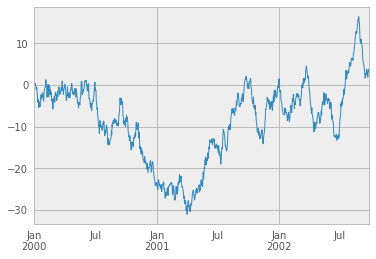

In [65]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum() #cumulative sum
ts.plot()
ts.cumsum?

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


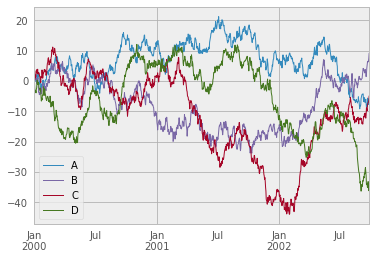

In [66]:
#Plotting a dataframe
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df=df.cumsum() #cumulative sum to make the plot visually more robust
df.plot()

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


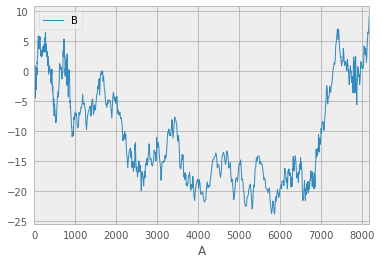

In [67]:
df['A']=np.abs(df['A']).cumsum() # make A ever increasing
df.plot(x='A',y='B') #Plot A vs. B

#7.2. Changing the plot `kind`

The keyword argument `kind` of the plot function allows to change the plot type.

Available types are:

* `bar` or  `barh` for bar plots
* `kde` or `density` for density plots
* `area` for area plots
* `scatter` for scater plots
* `hexbin` for hexagonal bin plots
* `pie` for pie pots

In addition to these `kind`'s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface.

Finally, there are several plotting functions in `pandas.tools.plotting`:
* Scatter Matrix
* Andrews Curves
* Parallel Coordinates
* Lag Plot
* Autocorrelation Plot
* Bootstrap Plot
* RadViz


#### Bar Plots

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


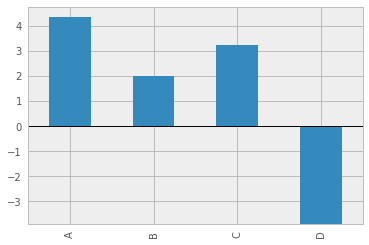

In [68]:
df.ix[5].plot(kind='bar'); plt.axhline(0, color='k') 

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


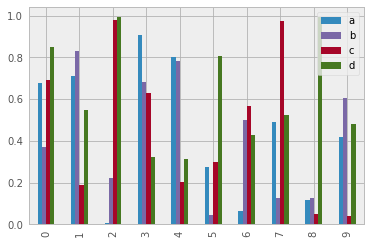

In [69]:
#data frame
df2 = pd.DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot(kind='bar');

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


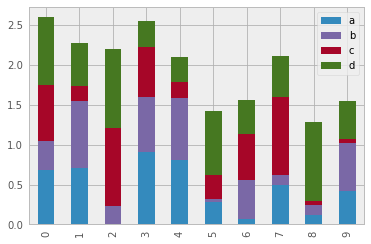

In [70]:
#stacked
df2.plot(kind='bar',stacked=True)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


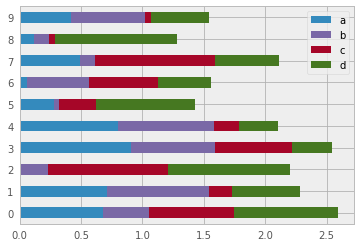

In [71]:
#stacked horizontal
df2.plot(kind='barh',stacked=True)

#### Histograms

2000-01-01         NaN
2000-01-02    0.070913
2000-01-03    0.133912
2000-01-04    0.316185
2000-01-05    1.616967
2000-01-06    1.278182
2000-01-07    1.790439
2000-01-08    1.752253
2000-01-09    2.207543
2000-01-10    1.373701
2000-01-11    0.852391
2000-01-12    1.449482
2000-01-13    1.778292
2000-01-14    2.732603
2000-01-15    1.696955
2000-01-16    0.227658
2000-01-17    1.026835
2000-01-18    0.101492
2000-01-19    1.344893
2000-01-20    2.149443
2000-01-21    2.392398
2000-01-22    2.301847
2000-01-23    0.934611
2000-01-24    1.237767
2000-01-25    1.083818
2000-01-26    0.340141
2000-01-27    0.338272
2000-01-28    0.855412
2000-01-29    1.337087
2000-01-30    2.061731
                ...   
2002-08-28    8.155860
2002-08-29    9.169072
2002-08-30    7.986741
2002-08-31    8.249927
2002-09-01    7.884083
2002-09-02    5.762010
2002-09-03    5.211491
2002-09-04    4.701458
2002-09-05    4.406521
2002-09-06    4.454511
2002-09-07    4.272012
2002-09-08    4.214813
2002-09-09 

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


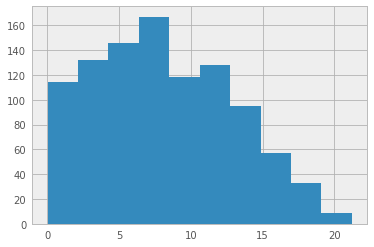

In [72]:
#histogram of a series. Note we apply diff to undo the cumsum before
print (df['A'].diff())
df['A'].diff().hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb67cc7fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcb67b8d1d0>]], dtype=object)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


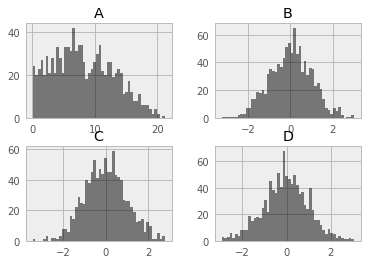

In [73]:
#histogram of a Data Frame. Note we apply diff to undo the cumsum before
df.diff().hist(color='k', alpha=0.5, bins=50)

#### Box Plots


          0         1         2         3         4
0  0.426385  0.073490  0.656192  0.558762  0.238066
1  0.831852  0.324104  0.246517  0.030236  0.633227
2  0.919606  0.306596  0.225051  0.181491  0.330098
3  0.909707  0.061220  0.445632  0.358637  0.209390
4  0.003265  0.489948  0.563821  0.450856  0.511758
5  0.989987  0.759497  0.087286  0.446989  0.209415
6  0.234556  0.949227  0.817689  0.488496  0.368428
7  0.827385  0.498589  0.705970  0.650829  0.392453
8  0.193496  0.786077  0.407881  0.657887  0.635198
9  0.560343  0.095492  0.529329  0.051978  0.336465


/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


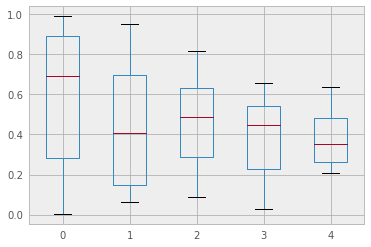

In [74]:
df = pd.DataFrame(rand(10,5))
print (df)
bp = df.boxplot()

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


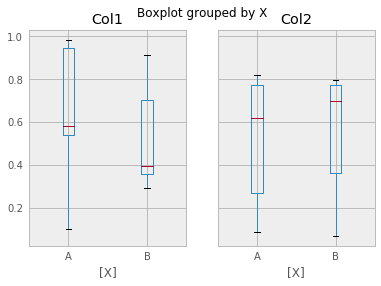

In [75]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )
df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])
#group boxplot by a series
bp = df.boxplot(by='X')

#### Area Plot

0.19.2


/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


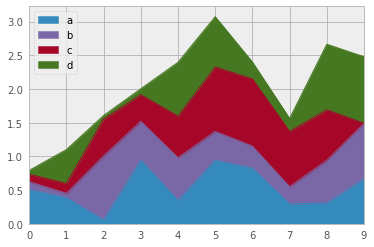

In [76]:
#note only available in pandas 0.14
print (pd.__version__)
df = pd.DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot(kind='area')

#### Scatter Matrix Plot


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcb676bf278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcb673a7b70>]], dtype=object)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


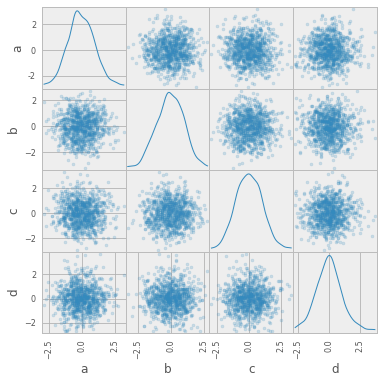

In [77]:
from pandas.tools.plotting import scatter_matrix
df = pd.DataFrame(randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')


#### Density Plots

Plot an estimated probability density function (PDE)

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


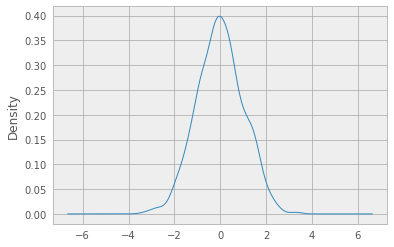

In [78]:
ser = pd.Series(numpy.random.randn(1000))
ser.plot(kind='kde')

#### Andrews Curves

Andrews curves allow one to plot multivariate data as a large number of curves that are created using the attributes of samples as coefficients for Fourier series. By coloring these curves differently for each class it is possible to visualize data clustering. Curves belonging to samples of the same class will usually be closer together and form larger structures.

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


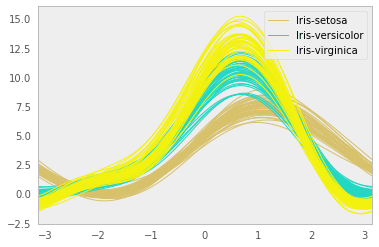

In [79]:
from pandas.tools.plotting import andrews_curves
data = pd.read_csv('data/iris.dat')
#print data
andrews_curves(data, 'Name')

#### Parallel Coordinates

Parallel coordinates is a plotting technique for plotting multivariate data. It allows one to see clusters in data and to estimate other statistics visually. Using parallel coordinates points are represented as connected line segments. Each vertical line represents one attribute. One set of connected line segments represents one data point. Points that tend to cluster will appear closer together.

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


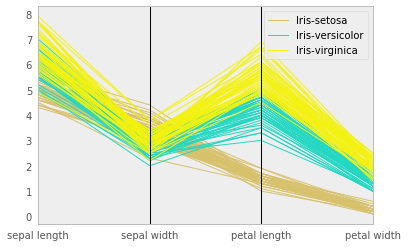

In [80]:
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(data, 'Name')

#### Rad Viz

RadViz is a way of visualizing multi-variate data. It is based on a simple spring tension minimization algorithm. Basically you set up a bunch of points in a plane. In our case they are equally spaced on a unit circle. Each point represents a single attribute. You then pretend that each sample in the data set is attached to each of these points by a spring, the stiffness of which is proportional to the numerical value of that attribute (they are normalized to unit interval). The point in the plane, where our sample settles to (where the forces acting on our sample are at an equilibrium) is where a dot representing our sample will be drawn. Depending on which class that sample belongs it will be colored differently.

/root/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['monospace'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


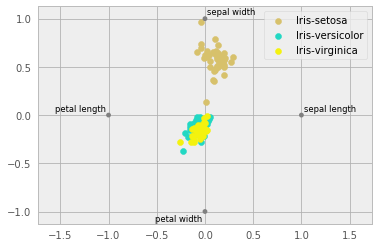

In [81]:
from pandas.tools.plotting import radviz
radviz(data, 'Name')

### Exercise 6.1.c: Visual Analysis of Complaints in NYC

Time to try it out by yourself. Go to to the exercise and try to solve it.

# References

* [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [Tutorials and Cookbooks] (http://pandas.pydata.org/pandas-docs/stable/tutorials.html)